In [1]:
import os
import subprocess

def git_repo_root():
    # Run the 'git rev-parse --show-toplevel' command to get the root directory of the Git repository
    try:
        root = subprocess.check_output(['git', 'rev-parse', '--show-toplevel'], universal_newlines=True).strip()
        return root
    except subprocess.CalledProcessError:
        # Handle the case where the current directory is not inside a Git repository
        return None

# Get the root directory of the Git repository
git_root = git_repo_root()

if git_root:
    # Change the working directory to the root of the Git repository
    os.chdir(git_root)
    print(f"Changed working directory to: {git_root}")
else:
    print("Not inside a Git repository.")

Changed working directory to: /Users/stephenrobbins/Documents/Documents-Stephens_MacBook_Pro/Python/Random/Diffusion_project


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


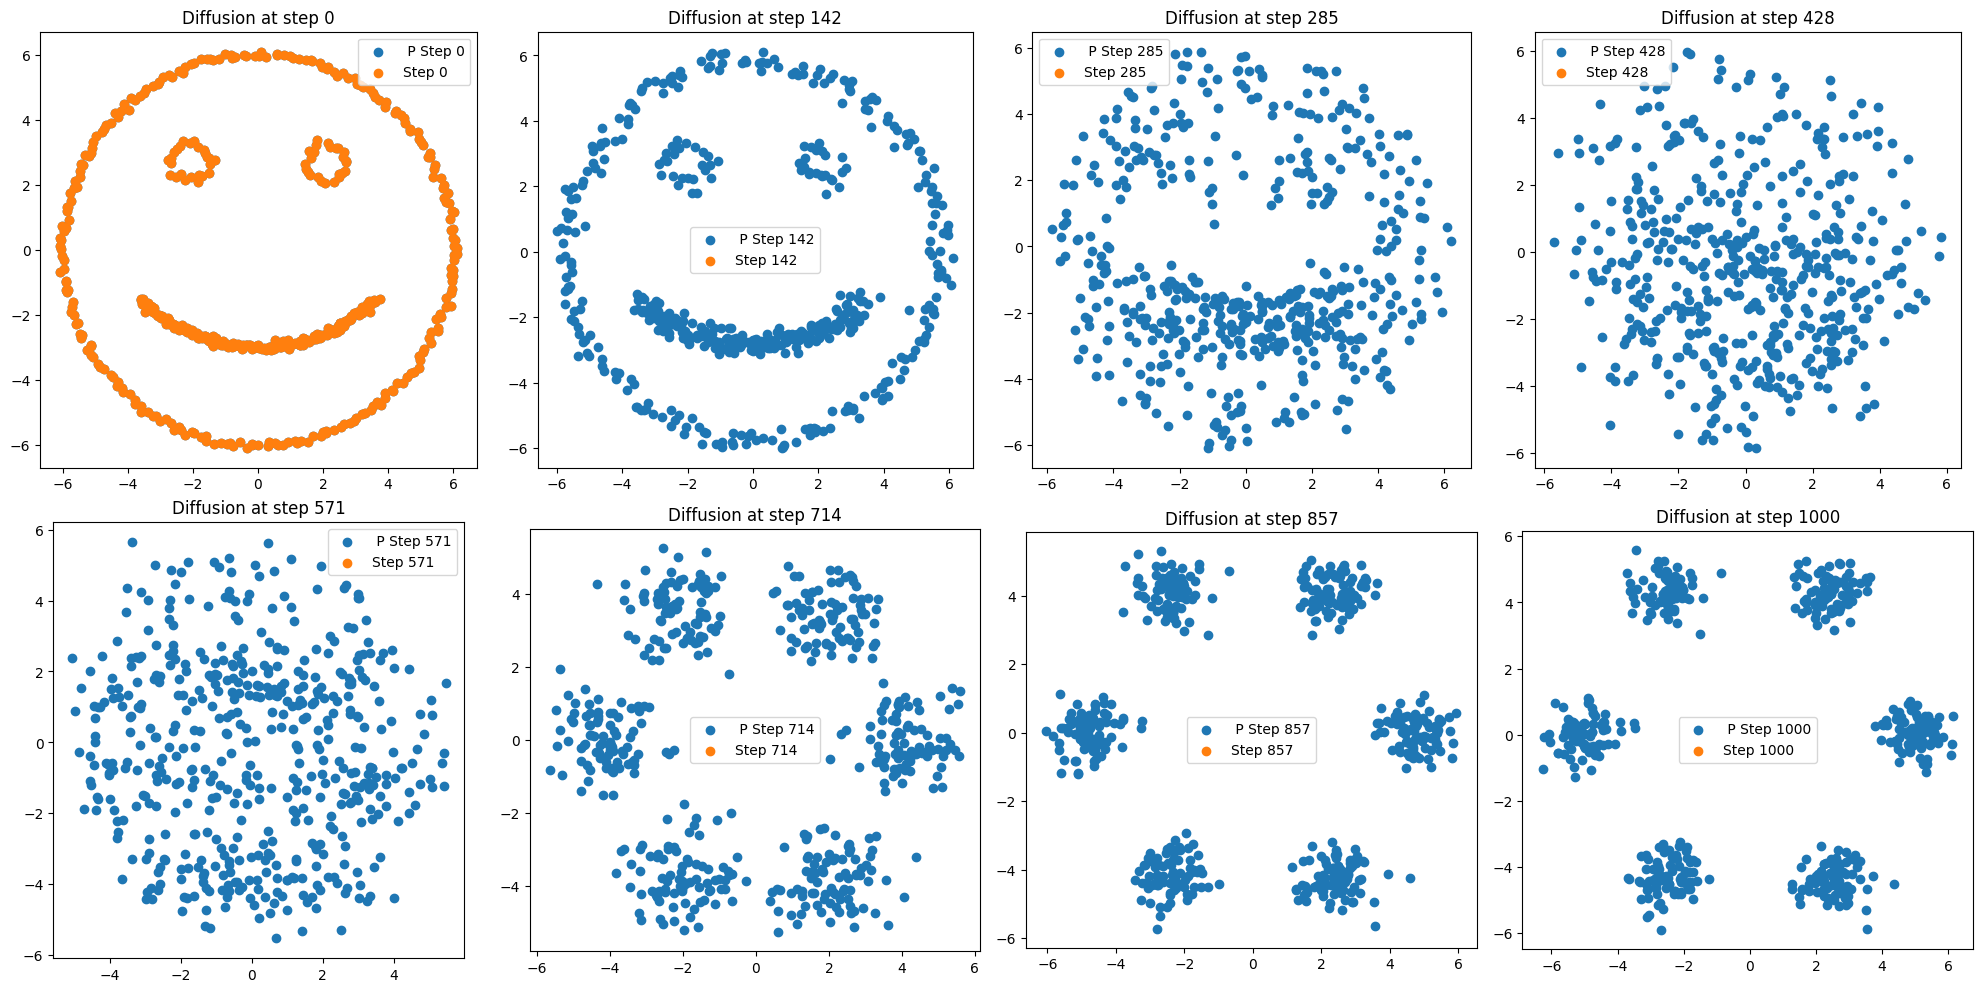

In [7]:
%load_ext autoreload
%autoreload 2

from diffusion import BridgeDiffusionVPSDE
from data import generate_mixture_gaussians
from data import generate_happy_face

# Make sure our diffusion process actually builds the bridge

data_x= generate_happy_face(500)
sde = BridgeDiffusionVPSDE(generate_mixture_gaussians,  bmin=.1, bmax=1)

sde.plot_forward_diffusion(data_x)
#For some reason the euler method fails at step 1000, idk

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


  7%|▋         | 1000/15000 [01:59<21:13, 10.99it/s] 

Epoch: 1000 and Loss: 2.188751220703125


  7%|▋         | 1000/15000 [02:11<21:13, 10.99it/s]

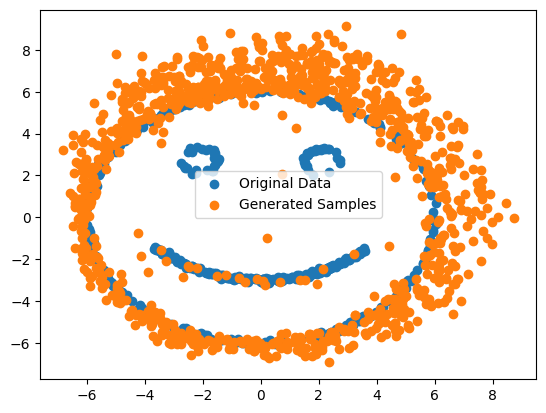

 13%|█▎        | 1999/15000 [04:02<20:20, 10.65it/s]   

Epoch: 2000 and Loss: 1.7750991582870483


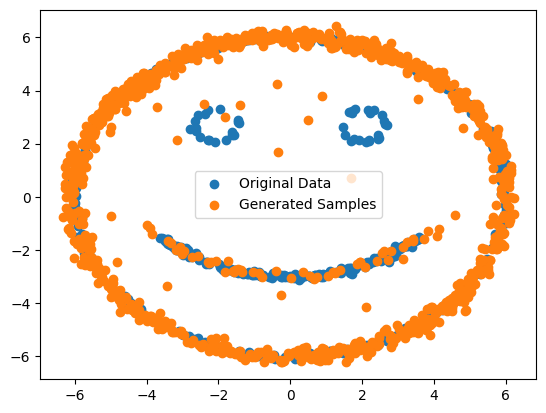

 20%|██        | 3000/15000 [06:02<19:33, 10.23it/s]  

Epoch: 3000 and Loss: 1.6770052909851074


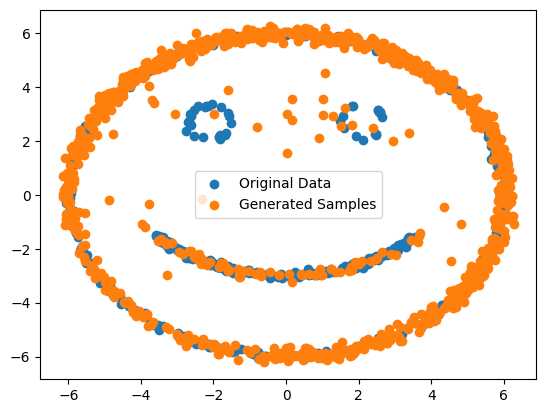

 27%|██▋       | 3999/15000 [07:59<17:48, 10.30it/s]  

Epoch: 4000 and Loss: 1.6342930793762207


 27%|██▋       | 3999/15000 [08:12<17:48, 10.30it/s]

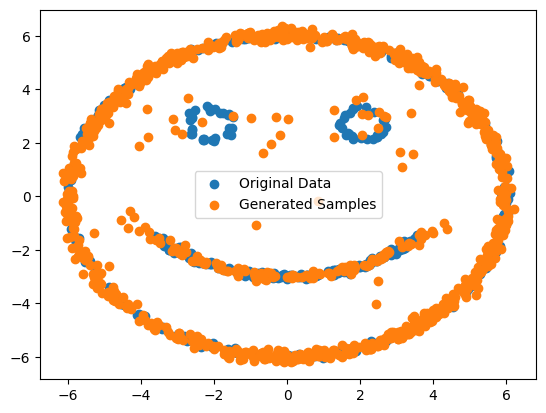

 33%|███▎      | 5000/15000 [10:02<15:51, 10.51it/s]  

Epoch: 5000 and Loss: 1.6044840812683105


 33%|███▎      | 5000/15000 [10:12<15:51, 10.51it/s]

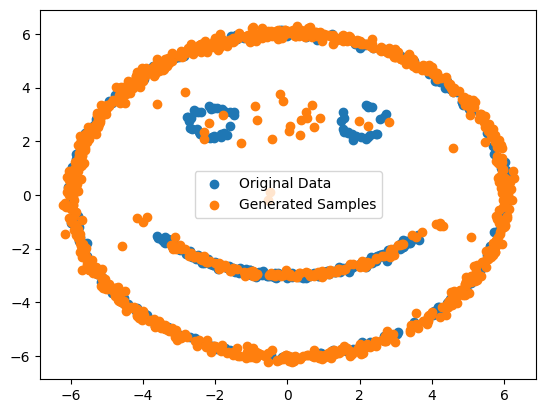

 40%|███▉      | 5999/15000 [12:33<15:44,  9.53it/s]   

Epoch: 6000 and Loss: 1.5873429775238037


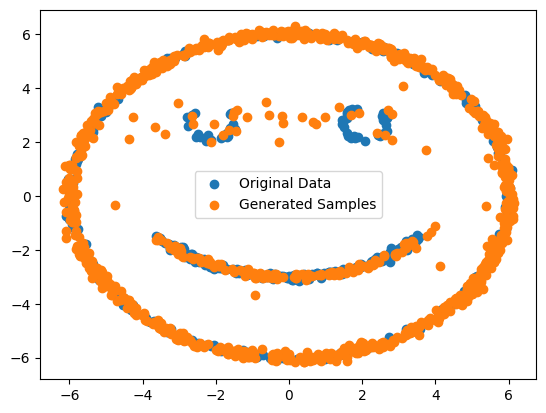

 47%|████▋     | 6999/15000 [14:33<12:17, 10.85it/s]  

Epoch: 7000 and Loss: 1.5723153352737427


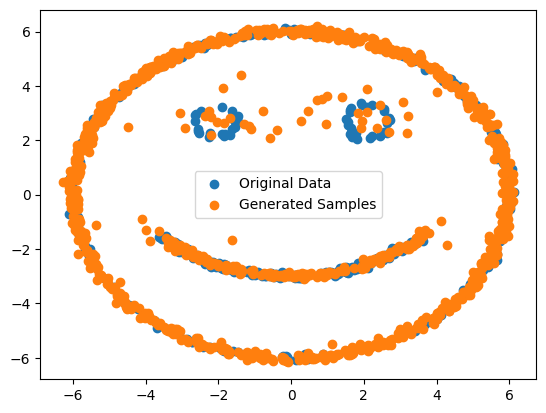

 53%|█████▎    | 8000/15000 [16:46<10:41, 10.91it/s]  

Epoch: 8000 and Loss: 1.564460039138794


 53%|█████▎    | 8000/15000 [17:02<10:41, 10.91it/s]

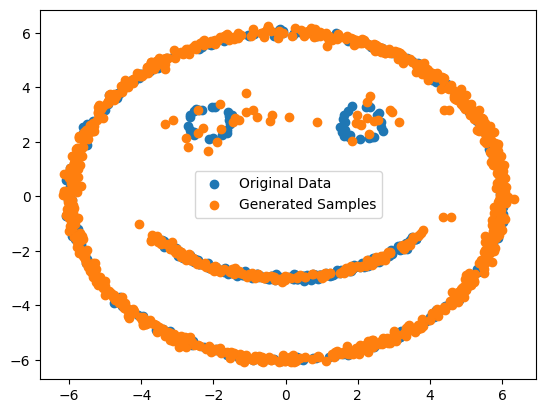

 60%|██████    | 9000/15000 [19:26<09:12, 10.86it/s]  

Epoch: 9000 and Loss: 1.5575239658355713


 60%|██████    | 9000/15000 [19:42<09:12, 10.86it/s]

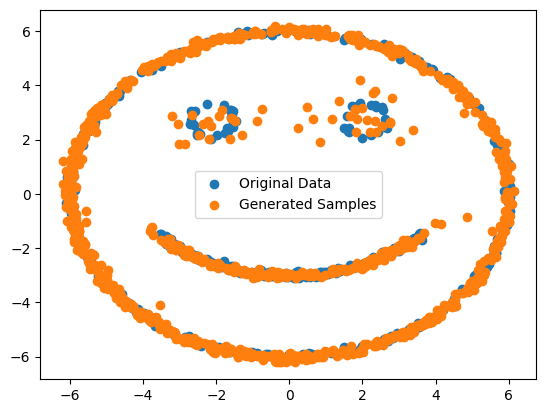

 67%|██████▋   | 9999/15000 [21:42<09:03,  9.20it/s]  

Epoch: 10000 and Loss: 1.550217628479004


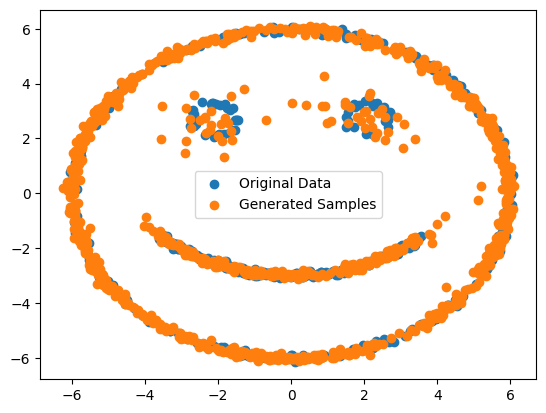

 73%|███████▎  | 11000/15000 [24:00<08:04,  8.26it/s]  

Epoch: 11000 and Loss: 1.547486424446106


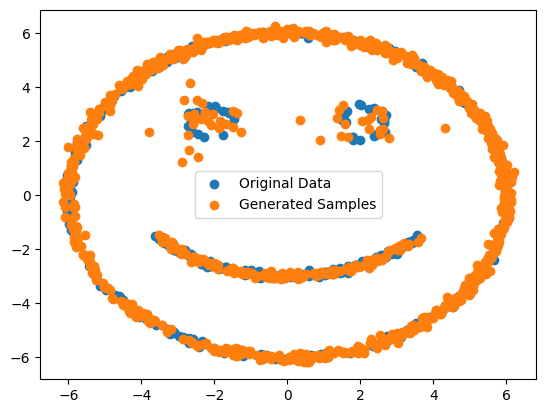

 80%|████████  | 12000/15000 [26:14<07:55,  6.31it/s]  

Epoch: 12000 and Loss: 1.547235131263733


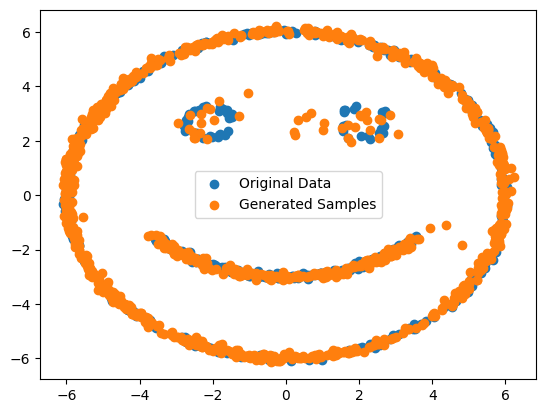

 87%|████████▋ | 13000/15000 [28:49<09:43,  3.42it/s]  

Epoch: 13000 and Loss: 1.540867567062378


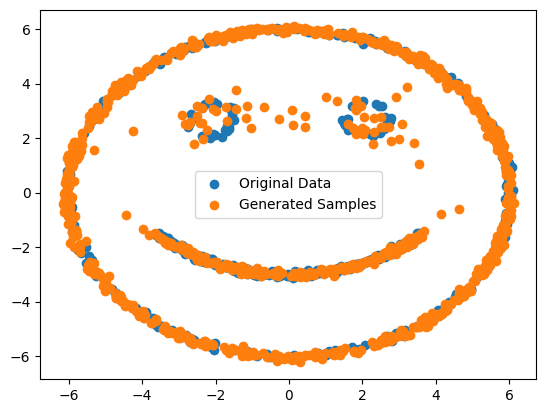

 93%|█████████▎| 14000/15000 [31:50<02:32,  6.54it/s]  

Epoch: 14000 and Loss: 1.5385338068008423


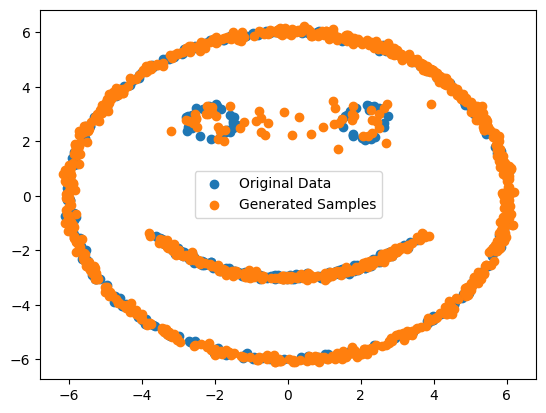

100%|█████████▉| 14999/15000 [34:35<00:00,  5.98it/s]  

Epoch: 14999 and Loss: 1.5345796346664429


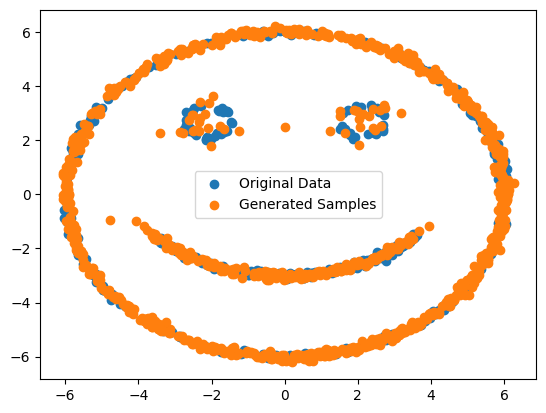

100%|██████████| 15000/15000 [34:56<00:00,  7.15it/s]


In [13]:
%load_ext autoreload
%autoreload 2

from torch.utils.data import DataLoader, TensorDataset
from training import train_score_network
from model import Bridge_Diffusion_Net

sde = BridgeDiffusionVPSDE(generate_mixture_gaussians,  bmin=.1, bmax=1)
data = generate_happy_face(num_samples=32000)
dataloader = DataLoader(TensorDataset(data), batch_size=500, shuffle=True)
score_net = Bridge_Diffusion_Net(input_dim=4, output_dim=2)

train_score_network(dataloader, score_net, sde, epochs=15000, bridge=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


IndexError: too many indices for tensor of dimension 1

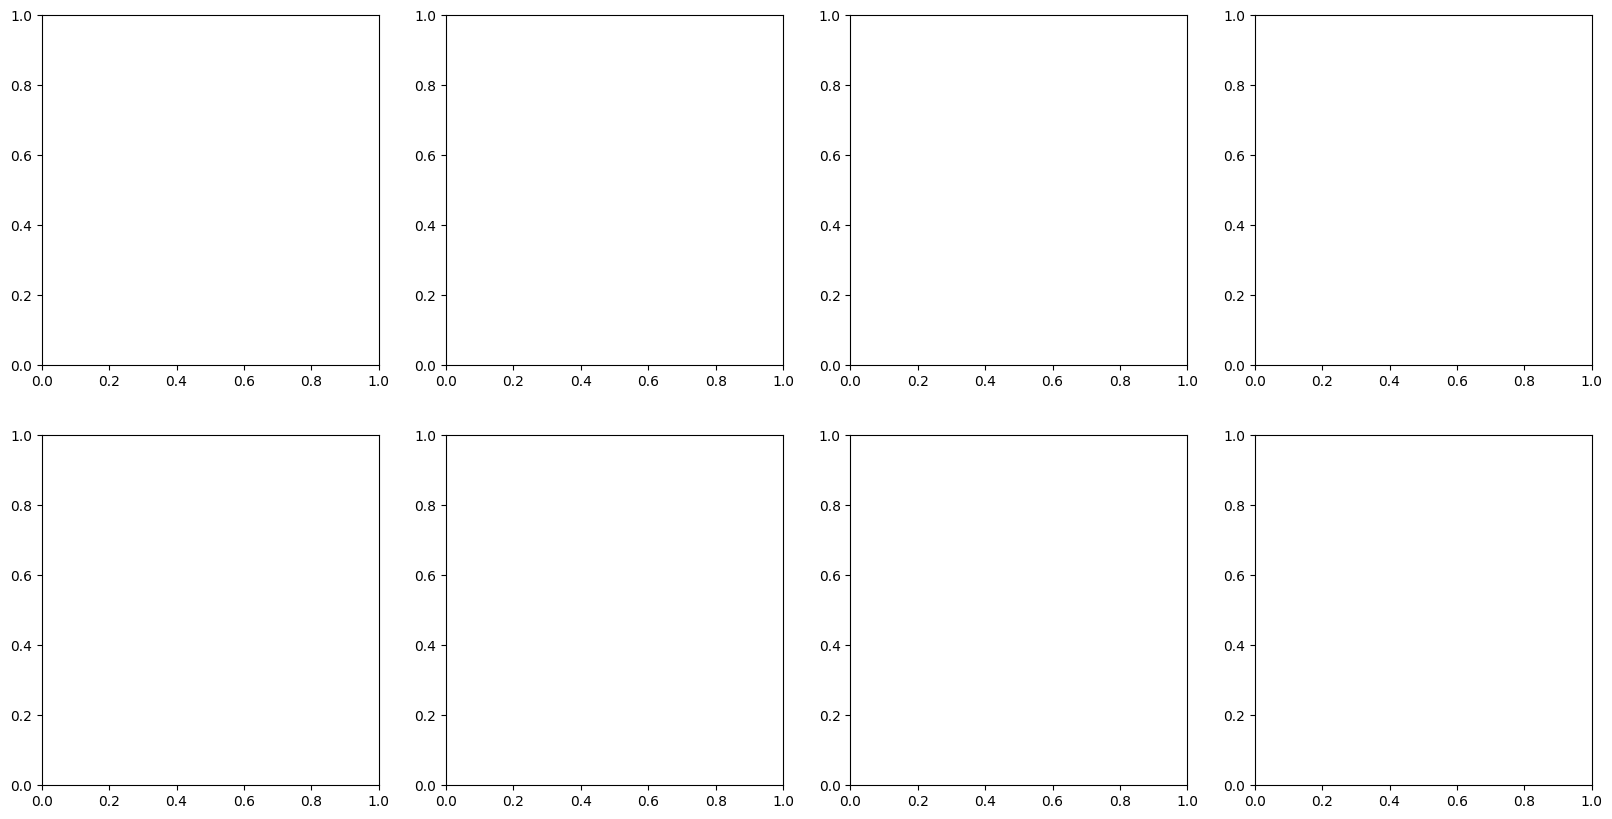

In [19]:
%load_ext autoreload
%autoreload 2
from diffusion import BridgeDiffusionVPSDE
sde = BridgeDiffusionVPSDE(generate_mixture_gaussians,  bmin=.1, bmax=1)
sde.plot_backward_diffusion(score_net)
